# 기하학적 처리  
"기하학적 처리"란  
- 영상을 이동하거나 영상의 모양을 변형하는 처리  


증강현실이나 문서의 사각영역 찾기같은 것에 사용된다.  

## 기본적인 기하학적 변환
- 평행이동 trainslation: 영상을 평행 이동한다.  
- 크기변환 scaling: 영상의 크리를 변경한다.  
- 회전 roation: 영상을 회전한다.  

## 절차

  1. 입령영상이 주어지면 입력영상의 화소가 출력영상에서 어디로 가느냐를 계산  
  2. 소수점 위치에 놓인 화소의 값을 주위 화소들을 이용하여 추정하는 절차  

## 순방향 변환  

입력 영상에서 (x, y)위치에 있는 ~  


### 문제점

배수를 하는 연산을 하면 빈 검정색 홀이 생기게 된다.  

## 역방향 사상

입력 영상을 확대된 영상으로 보고 출력영상을 원본 영상으로 보게 되면  

이 점이 입력영상에서 어딘지를 보게 된다. 모든 점에서의 계산을 하기 때문에 문제가 생기지 않는다.  

원래 곱하기2를 했다면 나누기2를 해야된다.  즉 역으로 하는 것이다.





In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]


def imshow(tit, images):
    plt.title(tit)
    if len(images.shape) == 3:
        plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images, cmap='gray')
    plt.show()

# 순방향 연산

512 512


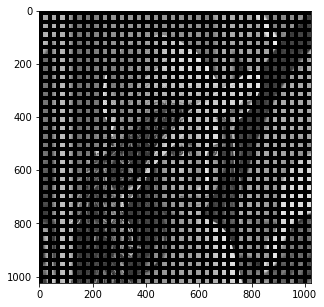

In [3]:
src = cv2.imread("img/Lenna.png", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((height*2, width*2), src.dtype)

for r in range(height):
    for c in range(width):
        dst[r*2, c*2] = src[r, c]

imshow("", dst)

2배로 확대하는 것은 잘 되지 않는데 2배로 줄이는 것은 가능하다.  

오히려 중복되어 계산하여 압축이 될 수 있다.  
계산량만 더 잡아먹는다.



512 512


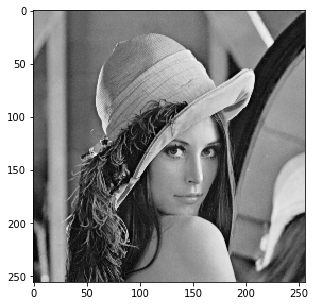

In [5]:
src = cv2.imread("img/Lenna.png", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((int(height/2), int(width/2)), src.dtype)

for r in range(height):
    for c in range(width):
        dst[int(r/2.0), int(c/2.0)] = src[r, c]

imshow("", dst)

# 역방향 연산

512 512


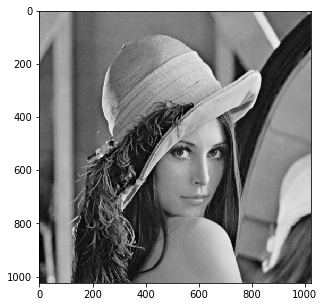

In [6]:
src = cv2.imread("img/Lenna.png", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((height*2, width*2), src.dtype)
height2, width2 = dst.shape
for r in range(height2):
    for c in range(width2):
        dst[r, c] = src[int(r/2.0), int(c/2.0)]

imshow("", dst)

512 512


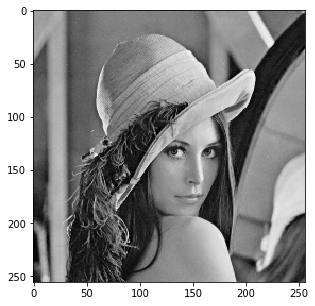

In [8]:
src = cv2.imread("img/Lenna.png", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((int(height / 2), int(width / 2)), src.dtype)
height2, width2 = dst.shape
for r in range(height2):
    for c in range(width2):
        dst[r, c] = src[int(r * 2.0), int(c * 2.0)]

imshow("", dst)

### 일반화


512 512
(358, 358)


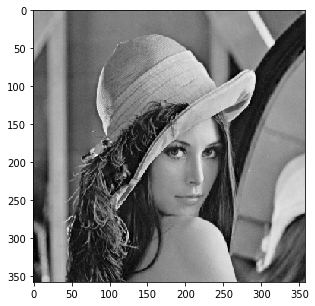

In [12]:
#파라미터
#배수정하기
s = 0.7  # s = 2.0

src = cv2.imread("img/Lenna.png", 0)
height, width = src.shape

print(height, width)

# 사이즈를 s배 해준다. 
dst = np.zeros((int(height * s), int(width * s)), src.dtype)
height2, width2 = dst.shape

for r in range(height2):
    for c in range(width2):
        # 역방향이기 때문에 s로 나눠준다.
        dst[r, c] = src[int(r / s), int(c / s)]
print(dst.shape)
imshow("", dst)

# 보간법


원래 목적지의 위치가 7이였다.  3으로 나누는 연산을 했을 때 2.3333의 위치가 나온다.  
그런데 이 위치는 존재하지 않는다.  

## 보간법의 종류

- 1차원 최근접 (보간법이라 부르지는 않음)
- 선형  
    두 점을 기준으로 얼마나 떨어져있는지를 직선의 방정식을 푼다.  
    
- 3차  
    비선형, 곡선으로 처리한다.  
    정밀하게 할수록 계산량이 많아진다.  
    
- 2차원 최근접  
    
- 양선형  
    3번이 필요하다.  
    - 우리가 이미 알고있는 4개의 인접 화소의 값을 이용한다.
    - 양선형 보간법은 비례식을 이용하여 중간에 놓인 화소의 값을 추정하는 방법
    - 대부분은 픽셀은 선형으로 증가한다고 가정하고 보간법을 사용하기 때문에 가능.  
    
- 양3차  



# Affine 행렬 M
scale, translation, rotation 과 같은 것들을 어떻게 한번에 할 수 있을까 고민하다 나온 것이 행렬을 사용하는 방법이다.  

이 매트릭스는 어떻게 구성되어있을까  
rotaion  
회전 변화를 alpha에 몇도를 넣는지를 생각하면 됨  
`
M = cos(alpha)    -sin(alpha)     t_x  
    sin(alpha)     cos(alpha)     t_y
`  
`
1 0 10
0 1 20
`  
3번째 값을 translation 되는 양으로 인식할 수 있다.  

그럼 Scale은 어떻게 되는지 보자  



`
2 0 0   x
0 2 0   y
`
`        1
x -> 2x
y -> 2y

2| 1 0 0 |
 | 0 1 0 | 
`  
이 행렬 6개로 모든 transformation을 할 수 있다.  

영상에 이 m 매트릭스를 곱하게되면 회전, 평행이동과 같은 것들을 구할 수 있다.  



In [13]:
M = np.array( [[1, 0, 50], [0, 1, -30]])

p = np.array( [[5], [7], [1]] )

np.matmul(M, p) # 5 + 50, 7 - 30

array([[ 55],
       [-23]])

In [14]:
M = np.array([[1, 0, 50], [0, 1, -30]])

p = np.array([[5, 6, 7, 8, 9, 10], [7, 7, 7, 7, 7, 7], [1, 1, 1, 1, 1, 1]])

np.matmul(M, p)  # 5 + 50, 7 - 30

array([[ 55,  56,  57,  58,  59,  60],
       [-23, -23, -23, -23, -23, -23]])

이렇게 행렬로 구성해주는 이유는 compact하게 계산할 수 있기 때문  

전체영상의 좌표값을 넣어주면 어디로 변화하는지를 볼 수 있다.  



roation을 사용할때 cos, sin을 써야하는데  
컴퓨터에서는 라디언을 쓰지만  
opencv에서는 degree를 쓴다.  

## Open CV 함수의 보간법

`warpAffine (src, dst, M, dsize, flags = INTER_LINEAR)`  
open cv에서응 위 함수를 사용한다.  


# 크기 변환  

크기변환에는 M mat을 만들어줄 필요가 없다.  

그래서 크기에는 사용하는 함수가 있다.  

`resize (src, dst, dsize, fx = 0, fy = 0, interpolation = cv.INTER_LINEAR )`  

ex) `resize(src, dst, Size(), 2.0, 2.0)`  
2배로 resize  

python으로 해보자

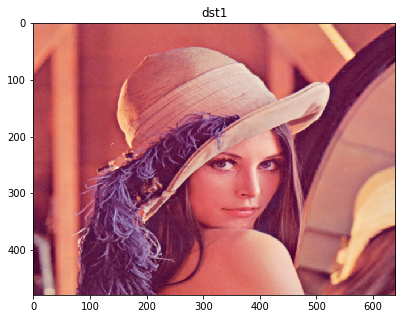

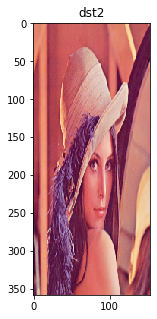

In [15]:
src = cv2.imread('img/Lenna.png')

dst1 = cv2.resize(src, dsize=(640, 480)) # 원하는 크기를 지정하거나 
dst2 = cv2.resize(src, dsize=(0,0), fx = 0.3, fy=0.7) # 비율을 정해주거나

imshow("dst1",dst1)
imshow("dst2",dst2)


확실하게 보간법 차이 확인하기

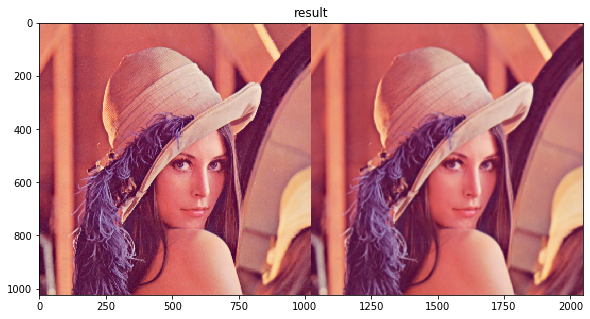

In [22]:
src = cv2.imread('img/Lenna.png')
dst1 = cv2.resize(src, dsize=(0,0),fx = 0.5, fy=0.5, interpolation=0) # 0번 interploation 
dst1 = cv2.resize(dst1, dsize=(0,0),fx = 4.0, fy=4.0, interpolation=0) # 0번 interploation 
dst2 = cv2.resize(src, dsize=(0,0),fx = 0.5, fy=0.5, interpolation=1) # 0번 interploation 
dst2 = cv2.resize(dst2, dsize=(0,0), fx = 4.0, fy=4.0, interpolation=1) # 비율을 정해주거나

imshow('result', np.hstack((dst1, dst2)))
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

모자이크를 이런 방식으로도 할 수 있다.

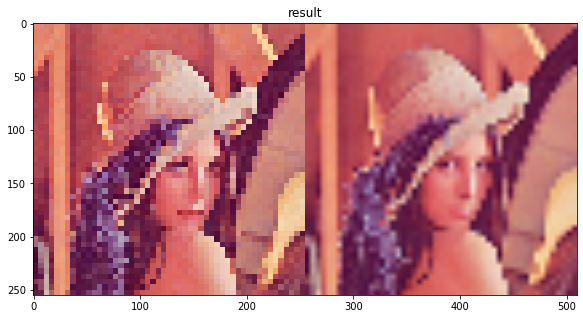

In [23]:
src = cv2.imread('img/Lenna.png')
dst1 = cv2.resize(src, dsize=(0, 0), fx=0.1, fy=0.1,
                  interpolation=0)  # 0번 interploation
dst1 = cv2.resize(dst1, dsize=(0, 0), fx=5.0, fy=5.0,
                  interpolation=0)  # 0번 interploation
dst2 = cv2.resize(src, dsize=(0, 0), fx=0.1, fy=0.1,
                  interpolation=1)  # 0번 interploation
dst2 = cv2.resize(dst2, dsize=(0, 0), fx=5.0, fy=5.0,
                  interpolation=1)  # 비율을 정해주거나

imshow('result', np.hstack((dst1, dst2)))
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

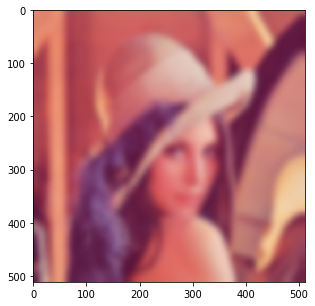

In [32]:
src = cv2.imread("img/Lenna.png")
for i in range(3):
    src = cv2.pyrDown(src);
for i in range(3):
    src = cv2.pyrUp(src);

imshow("", src)